<a href="https://colab.research.google.com/github/sgirdhar01/Portfolio/blob/main/sgirdhar_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UID:**


# **Introduction**

This homework is designed to test your understanding of mathematics tutorial discussed in this [link](https://cmsc426.github.io/math-tutorial/), specifically [RANSAC](https://cmsc426.github.io/math-tutorial#ransac). We highly recommend you to read the entire math tutorial, not just the RANSAC section. **The task is to fit the best possible line to two dimensional data points** using linear least square techniques discussed in the tutorial such that the line defines the best possible set of data points:

- Basics of Linear Algebra
- Line fitting using Linear Least Squares
- Outliers rejection using RANSAC



# **Revision: Vectors, Matrices, Eigenvalues, and Eigenvectors (Optional)**

Before we dive into the main tasks, let's quickly revise some key mathematical concepts: vectors, matrices, eigenvalues, and eigenvectors.

**NOTE:** This section is optional and not graded. If you are already familar with the algebra and numpy, you can ignore this step.

### **Given Matrix**

You are provided with the following 2D array (matrix):

$$
A = \begin{pmatrix} 4 & 2 \\ 1 & 3 \end{pmatrix}
$$

### **STEP 1: Calculate Covariance:**
Covariance is a measure of how two variables change together.

To calculate the covariance matrix for a 2D dataset:

1. **Compute the Mean:** Calculate the mean of each variable (column) in the matrix.
2. **Center the Data:** Subtract the mean from each corresponding data point.
3. **Calculate the Covariance Matrix:** Use the formula:

$$
C = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

For a 2D matrix \( A \), the covariance matrix \( C \) is:

$$
C = \begin{pmatrix}
\text{var}(x) & \text{cov}(x, y) \\
\text{cov}(x, y) & \text{var}(y)
\end{pmatrix}
$$

Finally, you can verify the result using NumPy's inbuilt function.

### **Step 2: Calculate Eigenvalues and Eigenvectors**

1. **Find the characteristic equation:**

   1.1 The characteristic equation is given by:

   $$
   \text{det}(A - \lambda I) = 0
   $$

   1.2 Expanding the determinant and simplify

   1.3 Solving the quadratic equation for get eigen values $\lambda$


2. **Find the eigenvectors:**


2.1 For each eigenvalue \( $\lambda_1 $) and ( $\lambda_2 $), substitute back into the equation \( ($A - \lambda I)v = 0 $) to find the corresponding eigenvector \($ v $).



# **What you need to do?  [TOTAL: 75 POINTS]**
The 2D points data is provided in the form of .mat file. The visualization of data with different noise level is shown in the following figure.

In [1]:
import scipy
import gdown
gdown.download_folder(id="1HceecW7W9GGocCrgAC0TNL9_7DrEgfeB", quiet=True, use_cookies=False)
data1 = scipy.io.loadmat("/content/data/data1.mat")["pts"]
data2 = scipy.io.loadmat("/content/data/data2.mat")["pts"]
data3 = scipy.io.loadmat("/content/data/data3.mat")["pts"]

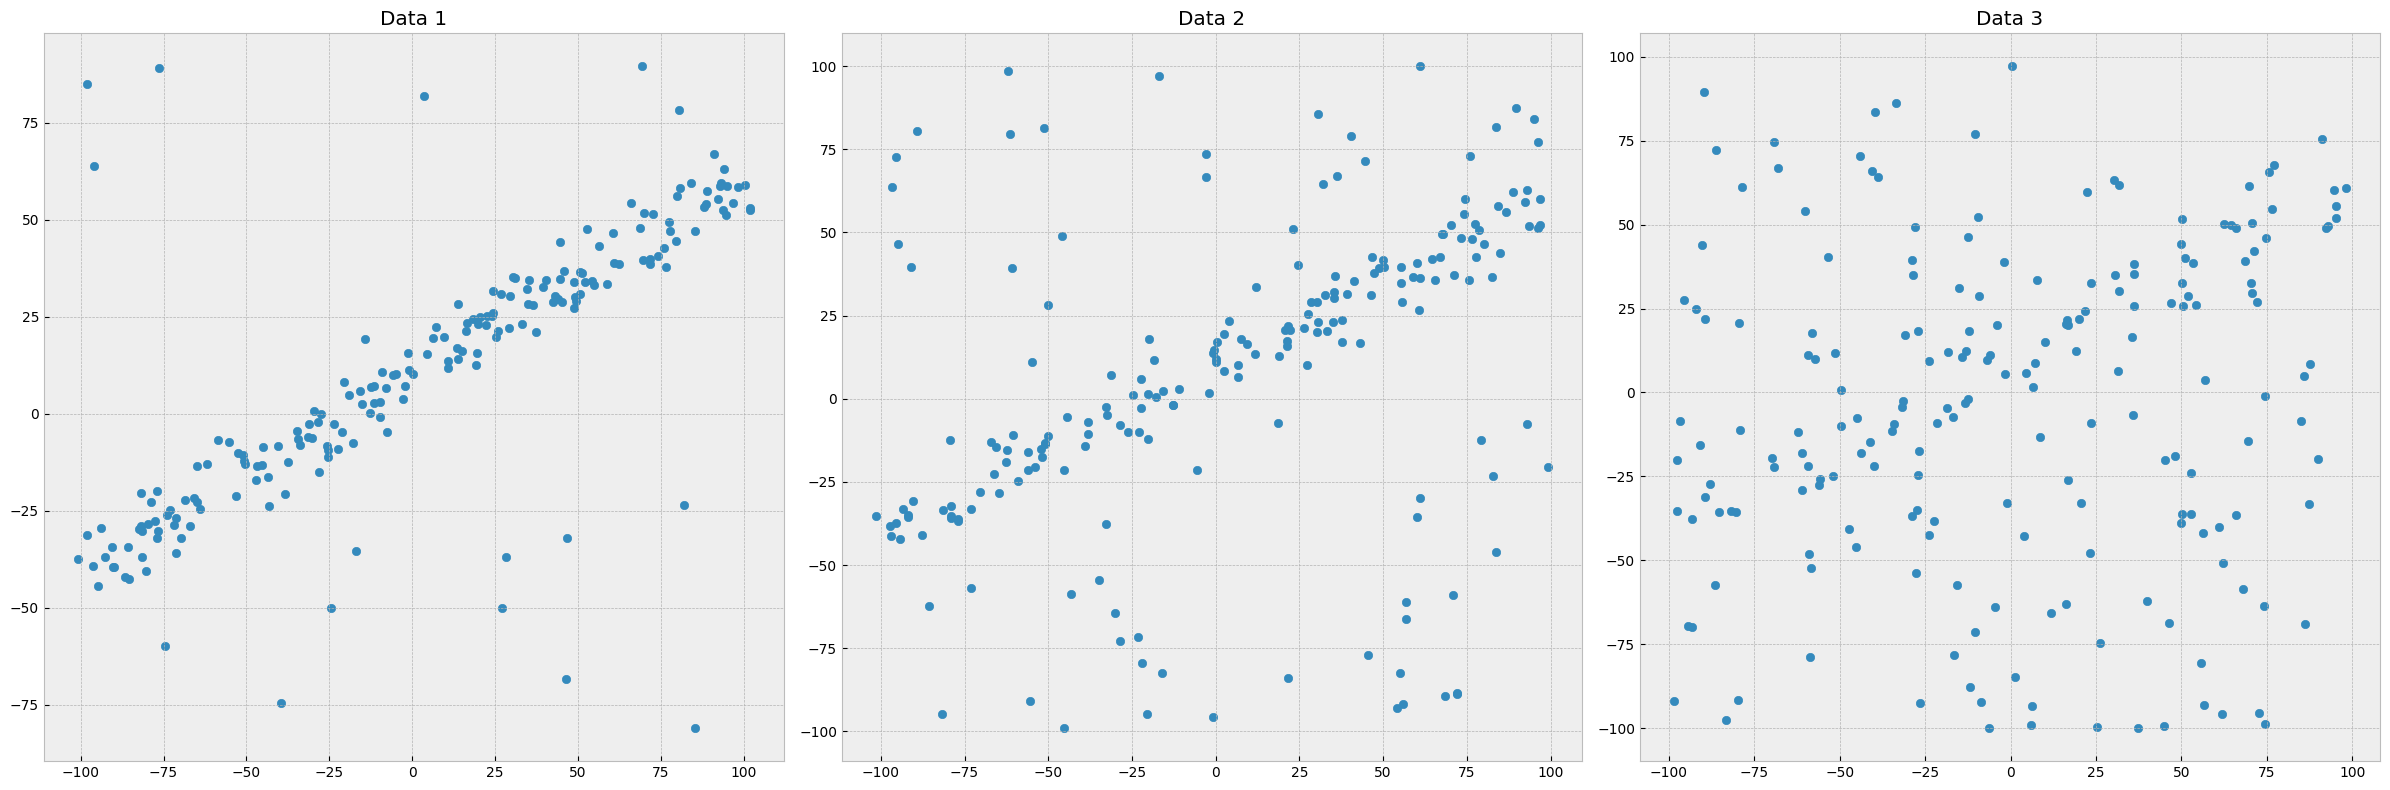

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import math
plt.style.use("bmh")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].scatter(data1[0],data1[1])
axes[0].set_title('Data 1')

axes[1].scatter(data2[0],data2[1])
axes[1].set_title('Data 2')

axes[2].scatter(data3[0],data3[1])
axes[2].set_title('Data 3')

plt.tight_layout()
plt.show()

### **STEP 1: Visualize geometric interpretation [20 points]**
Visualize geometric interpretation of eigenvalues/covariance matrix as shown in Fig. 10 of this [link](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)

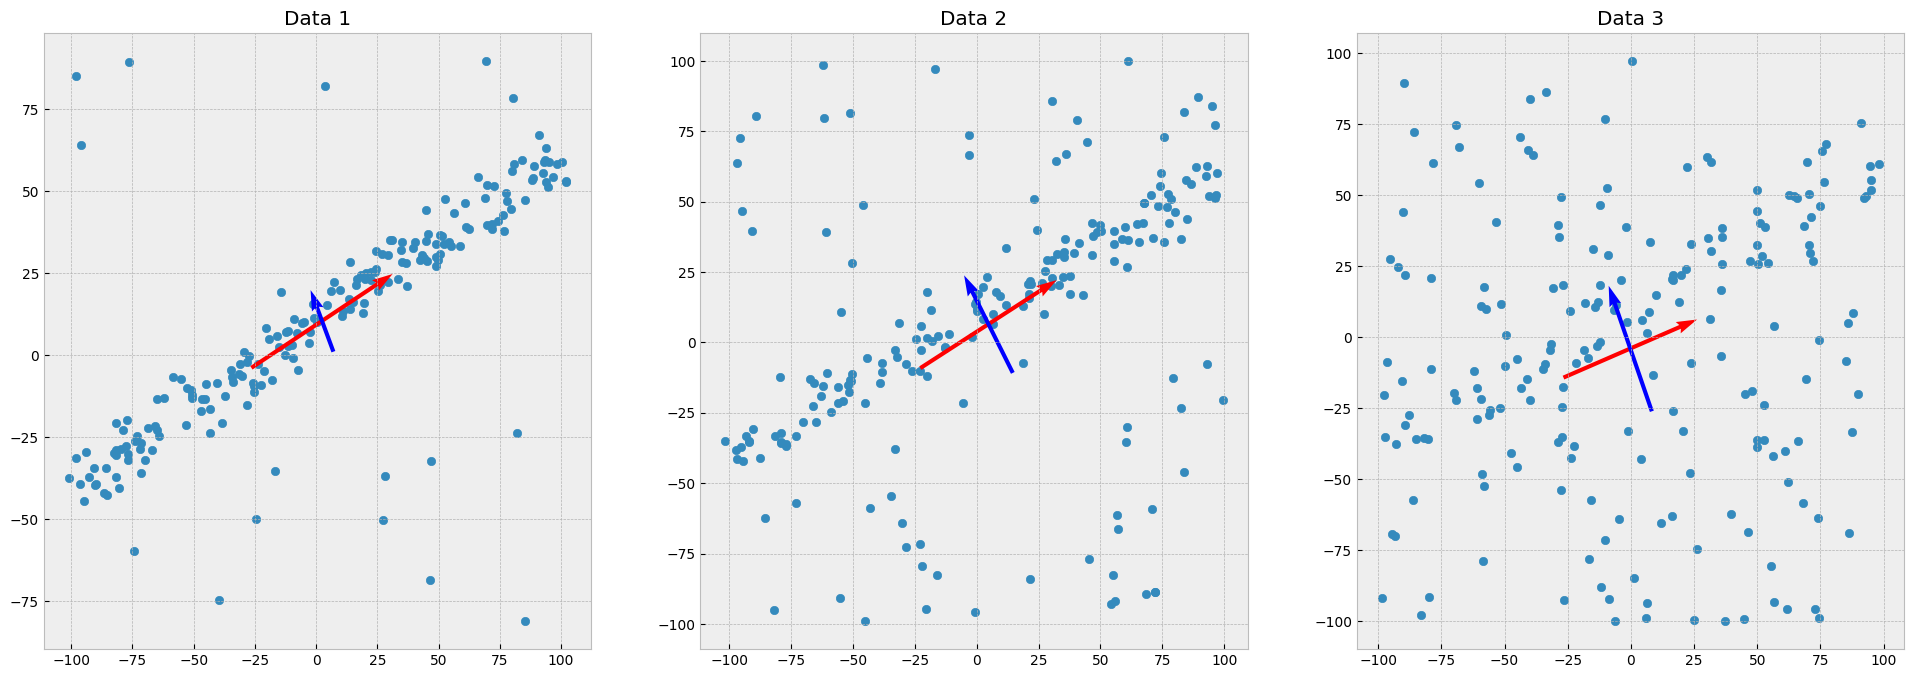

In [22]:
# hint: you can use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html for plotting the axes
import numpy as np
plt.style.use("bmh")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].scatter(data1[0],data1[1])
axes[0].set_title('Data 1')

axes[1].scatter(data2[0],data2[1])
axes[1].set_title('Data 2')

axes[2].scatter(data3[0],data3[1])
axes[2].set_title('Data 3')

#Calculate means of the datasets
mean1 = np.array([np.mean(data1[0]), np.mean(data1[1])])
mean2 = np.array([np.mean(data2[0]), np.mean(data2[1])])
mean3 = np.array([np.mean(data3[0]), np.mean(data3[1])])

#Calculate covariance matrices for the datasets
cov1 = np.cov(data1)
cov2 = np.cov(data2)
cov3 = np.cov(data3)

# Calculate the Eigenvalues and Eigenvectors for the covariance matrices
eigvals1, eigvecs1 = np.linalg.eig(cov1)
eigvals2, eigvecs2 = np.linalg.eig(cov2)
eigvals3, eigvecs3 = np.linalg.eig(cov3)

# Scale the eigenvectors proportionally by the square root of the eigenvalues
scaled_vectors1 = eigvecs1 * np.sqrt(eigvals1)
scaled_vectors2 = eigvecs2 * np.sqrt(eigvals2)
scaled_vectors3 = eigvecs3 * np.sqrt(eigvals3)

# Shift the origin of the arrows to match the style of "Figure 10"
origin1 = mean1 - 0.5 * scaled_vectors1.T
origin2 = mean2 - 0.5 * scaled_vectors2.T
origin3 = mean3 - 0.5 * scaled_vectors3.T

# Plot the eigenvectors
axes[0].quiver(
    origin1[:, 0], origin1[:, 1],
    scaled_vectors1[0, :], scaled_vectors1[1, :],
    angles='xy', scale_units='xy', scale=1, color=['r', 'b']
)
axes[1].quiver(
    origin2[:, 0], origin2[:, 1],
    scaled_vectors2[0, :], scaled_vectors2[1, :],
    angles='xy', scale_units='xy', scale=1, color=['r', 'b']
)
axes[2].quiver(
    origin3[:, 0], origin3[:, 1],
    scaled_vectors3[0, :], scaled_vectors3[1, :],
    angles='xy', scale_units='xy', scale=1, color=['r', 'b']
)




###**STEP 2: RANSAC Implementation [35 points]**

1. **Random Sampling:**
   - Randomly select two data points.

2. **Line Equation:**
   - Calculate the slope \($m$) and intercept \($c$) of the line.


3. **Distance Calculation:**
   - For each data point \((x_i, y_i)\), compute the perpendicular distance to the line:
   - Count the points where this distance is less than a predefined threshold as inliers.

4. **Iteration:**
   - Repeat steps 1-3 for a set number of iterations, keeping track of the line equation with the highest inlier count.

5. **Final Model:**
   - Return the slope and intercept of the line with the most inliers and visualize it.


In [34]:
import random as rd
def RANSAC(X,Y):
    #initialize slope,intercept,inlier variables
    best_slope = None
    best_intercept = None
    best_inliers = None
    # Finding the best fit line with 10,000 iterations and a threshold of 1.
    for i in range(10000):
      #randomly choosing two data points
      rand_nums = np.random.choice(len(X),2,replace=False)
      point1 = (X[rand_nums[0]],Y[rand_nums[0]])
      point2 = (X[rand_nums[1]],Y[rand_nums[1]])
      #calculating slope, intercept
      slope = (point1[1]-point2[1])/(point1[0]-point2[0])
      intercept = point1[1]-(slope*(point1[0]))
      #calculating number on inliers
      inliers = 0
      for j in range(len(X)):
        if (abs(slope*X[j]+intercept - Y[j]) < 1):
          inliers+=1
      #updating the best fit line if necessary
      if (best_inliers == None) or (inliers > best_inliers):
        best_inliers = inliers
        best_slope = slope
        best_intercept = intercept
    #plotting the best fit line
    y_pred = best_slope * X + best_intercept

    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, color='blue')
    plt.plot(X, y_pred, color='red', label=f'Fitted line: y = {best_slope}x + {best_intercept}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    return(best_slope,best_intercept)

  #write the function here follwoing the steps above.

###**STEP 3: Final Visualization [20 points]**
Final Visualization

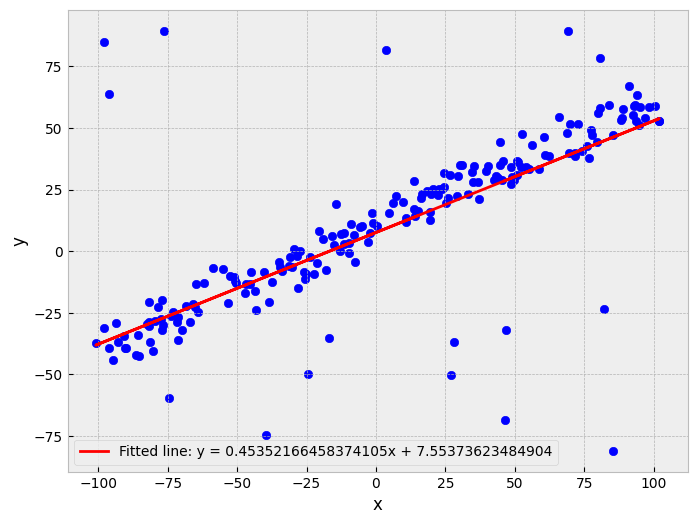

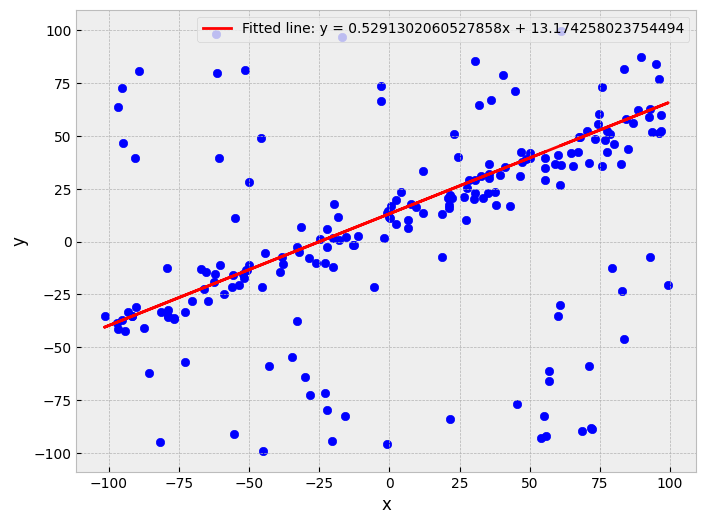

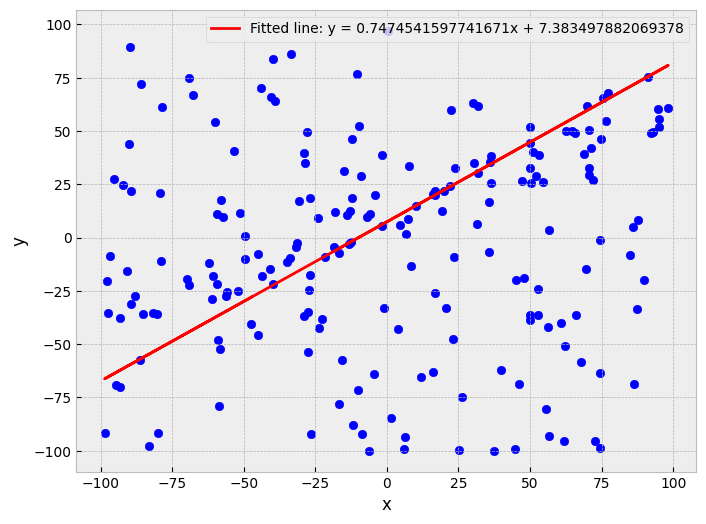

(0.7474541597741671, 7.383497882069378)

In [35]:
# Apply RANSAC to all three datasets
datasets = [data1, data2, data3]
titles = ['Data 1', 'Data 2', 'Data 3']
#write your code here
RANSAC(data1[0],data1[1])
RANSAC(data2[0],data2[1])
RANSAC(data3[0],data3[1])

# **Report [TOTAL: 25 POINTS]**
For each section of the homework, below are certain questions to check your understanding.

### **Problem 1: Linear Algebra Concepts** [12 Points]

1) Define Eigenvalues and Eigenvectors? What is the physical  meaning of it? [4 points]

2) What is the least squares method, and why is it important for fitting a line to data in linear regression? [4 points]

3) What is SVD (Singular Value Decomoposition) and its meaning for real-world application? [4 points]


Answers:
1. Eigenvectors are vectors that point in the same direction after going through a linear transformation, and the corressponding eigenvalues represent how these vectors are scaled. In the equation Av = λv, where A is a sqaure matrix, v is an eigenvector and lambda is the corresponding eigenvalue. The set of solutions to this equation is the eigenspace.
2. The least squares method is the method of finding a best fit line by minimizing the the squared perpendicular distances from each datapoint to the best fit line. It is important because it is a good way of capturing the trend in the data while also minimizing error.
3. SVD is a way of factoring a matrix into three simpler matrices. The first matrix is made of the left singular values of the original matrix. The second matrix is a diagonal matrix with the singular values on the diagonal. The last is the matrix of right singular values. Multiplied together these three matrices become the original matrix. In the real world, it can be used to reduce the dimensionality of data while mantaing the signifacant values of the original data. This makes the data easier to understand and visualize.

### **Problem 2: RANSAC Understanding** [7 points]

1) Discuss a scenario where the RANSAC algorithm might fail or be less effective. How could the algorithm be adjusted or combined with other techniques to mitigate this issue? [5 points]

2) How do the number of iterations and the inlier threshold in RANSAC affect the algorithm’s outcome? [2 points]

Answers:
  1. RANSAC might fail or be less effective when the data has many outliers or is noisy. The issue could be mitigated by cleaning up the data before hand and getting rid of obvious outliers. Also, combining RANSAC with methods like the least squares method might help.
  2. If the number of iterations is high, we are likely to obtain a better answer, however it will be slower and cost more. Having less iterations would be faster by less successful. If the inlier threshold is large, it is more likely to include outliers as inliers, so having a larger threshold is better for more noisy data. If the threshold is too low, it may lead to an underfitting of the data because the amount of inliners would be too small.

### **Problem 3: Null Space, Column Space and Rank of Matrix** [6 POINTS]

1)Define the nullspace, column space, and rank of a matrix. How are these concepts related? [3 points]

2) How does the rank of the matrix relate to its nullspace and column space? [3 points]




Answers:
1. The nullspace of a matrix is the collection of vectors that are transformed into the zero vector after going through a linear transformation defined by that matrix. The column space of a matrix is the collection of all vectors that are in the span of that matrix. The rank of a matrix dictates how much of the vector space R^m is covered by the matrix. It is the amount of linearly independent columns in the matrix. It is also the dimension of the column space of the matrix.
2. The rank which is the dimension of the column space and the dimension of the nullspace should add up to the amount of columns in the matrix. This is called the rank nullity theorem.

# Submission Guidelines

**If your submission does not comply with the following guidelines, you’ll be given ZERO credit.**

Your submission on ELMS(Canvas) must be a pdf file, following the naming convention **YourDirectoryID_proj1.pdf**. For example, xyz123_proj1.pdf.